***The Sparks Foundation***

**Data Science and Business Intelligence Internship**

**Task-1 Prediction using Supervised ML**

*Predict the percentage of an student based on the no. of study hours using Python/R/SAS*


*Importing packages*

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

*Reading the file*

In [3]:
link = "http://bit.ly/w-data"
dataset = pd.read_csv(link)
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Visualizing the dataset

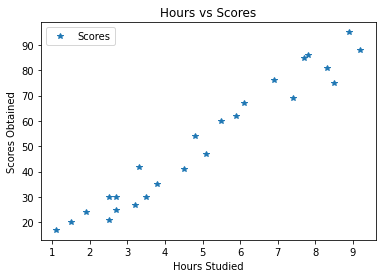

In [4]:
dataset.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores Obtained')  
plt.show()

Assigning values to the dependent and independent variable

In [5]:
X = dataset.iloc[:,:-1].values  
Y = dataset.iloc[:, 1].values

Splitting dataset into training and testing set

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

Training the algorithm

In [7]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


Plotting the regression line

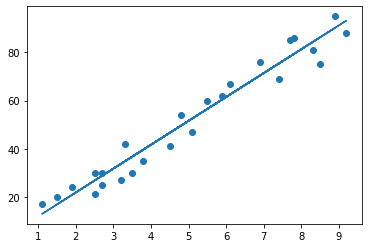

In [8]:
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

Predicting the scores for the given values in the test set

In [9]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing Actual vs Predicted

In [10]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

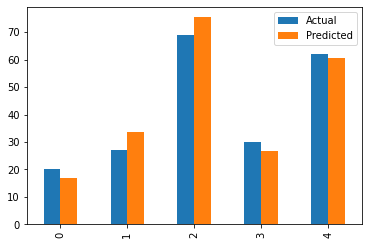

In [11]:
df.plot(kind = 'bar')

What will be predicted score if a student studies for 9.25 hrs/ day?

In [12]:
no_hours = 9.25
pred_score = regressor.predict([[no_hours]])
print("No of Hours = {}".format(no_hours))
print("Predicted Score = {}".format(pred_score[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


What will be predicted score if a student studies for 17.56 hrs/ day?

In [13]:
no_hours = 17.56
pred_score = regressor.predict([[no_hours]])
print("No of Hours = {}".format(no_hours))
print("Predicted Score = {}".format(pred_score[0]))

No of Hours = 17.56
Predicted Score = 176.0492878415123


Evaluating the model

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred)) 
print ('Mean Squared Error:' ,metrics.mean_squared_error(Y_test, y_pred))
print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
